In [1]:
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import re 
from PIL import Image

In [2]:
def renamed_files(path, label):
    i = 0 

    for filename in os.listdir(path):
      try : 
        extension = os.path.splitext(filename)[1]
        src = os.path.join(path, filename)
        dst = os.path.join(path, f"{label}{i}{extension}") 
        os.rename(src,dst)
        i += 1
      except Exception as e : 
          print(e)
          i += 1

path = "C:/Users/khanh/Documents/flower"
label = "flower"

renamed_files(path, label)

[WinError 183] Cannot create a file when that file already exists: 'C:/Users/khanh/Documents/flower\\9240129413_f240ce7866_n.jpg' -> 'C:/Users/khanh/Documents/flower\\flower0.jpg'
[WinError 183] Cannot create a file when that file already exists: 'C:/Users/khanh/Documents/flower\\9246304620_768d1f54d7_n.jpg' -> 'C:/Users/khanh/Documents/flower\\flower1.jpg'
[WinError 183] Cannot create a file when that file already exists: 'C:/Users/khanh/Documents/flower\\9309473873_9d62b9082e.jpg' -> 'C:/Users/khanh/Documents/flower\\flower3.jpg'
[WinError 183] Cannot create a file when that file already exists: 'C:/Users/khanh/Documents/flower\\9339697826_88c9c4dc50.jpg' -> 'C:/Users/khanh/Documents/flower\\flower4.jpg'
[WinError 183] Cannot create a file when that file already exists: 'C:/Users/khanh/Documents/flower\\9359374034_21fb12d613_n.jpg' -> 'C:/Users/khanh/Documents/flower\\flower5.jpg'
[WinError 183] Cannot create a file when that file already exists: 'C:/Users/khanh/Documents/flower\\937

In [3]:
def resize_images(src_path,dst_path):

    for filename in os.listdir(src_path):
      try :
          src_file = os.path.join(src_path, filename)
          img = Image.open(src_file)
          new_img = img.resize((64,64))
          
          if not os.path.exists(dst_path):
              os.makedirs(dst_path)
              
          dst_file = os.path.join(dst_path, filename)
          new_img.save(dst_file)
          print(f"Resize Succuss {filename}")
          
      except Exception as e : 
          print(e)
          continue
src_path = "C:/Users/khanh/Documents/flower"
dst_path = "C:/Users/khanh/Documents/train_flower"
resize_images(src_path,dst_path)    

Resize Succuss 9240129413_f240ce7866_n.jpg
Resize Succuss 9246304620_768d1f54d7_n.jpg
Resize Succuss 9309473873_9d62b9082e.jpg
Resize Succuss 9339697826_88c9c4dc50.jpg
Resize Succuss 9359374034_21fb12d613_n.jpg
Resize Succuss 9375675309_987d32f99e_n.jpg
Resize Succuss 9384867134_83af458a19_n.jpg
Resize Succuss 9399711558_7cb9547cd3_n.jpg
Resize Succuss 9400904374_37723396e3_n.jpg
Resize Succuss 9410186154_465642ed35.jpg
Resize Succuss 9427945592_07a2676945_n.jpg
Resize Succuss 9431890901_cd11bda584_n.jpg
Resize Succuss 9431896325_23bf6e8761.jpg
Resize Succuss 9432335346_e298e47713_n.jpg
Resize Succuss 9448615838_04078d09bf_n.jpg
Resize Succuss 9460336948_6ae968be93.jpg
Resize Succuss 9461693602_710f20904f.jpg
Resize Succuss 9481563239_01b585b41d_n.jpg
Resize Succuss 9482209981_bf7bf6022b_m.jpg
Resize Succuss 9483429732_5ae73eb672_n.jpg
Resize Succuss 9484354480_07ff2ef0a6.jpg
Resize Succuss 9485002920_59af6f4cac.jpg
Resize Succuss 9491955955_d0b2c83834.jpg
Resize Succuss 9497774249_7f5

In [4]:
src = "C:/Users/khanh/Documents/other_images"
resize_images(src,dst_path)  

Resize Succuss 0402bdd5d4ac3cf0d94b564ecd1025f3.jpg
Resize Succuss 0744e73a004b80f3b582b70e91125f5b.jpg
Resize Succuss 1695271848616.jpg
Resize Succuss 23032fd0a6044add706290d78c248f37.jpg
Resize Succuss 244713055_572604720655653_1956455714118020211_n.jpg
Resize Succuss 255652db534564f5ac046d75c7fa0f32.jpg
Resize Succuss 277793108_952835465416539_74592994681256022_n.jpg
Resize Succuss 289745885_5333925779980071_8312072896401091294_n.jpg
Resize Succuss 2ebb651e9cef760a041a4799adec456d.jpg
Resize Succuss 332277661_860190578395806_8329830226499762790_n.jpg
Resize Succuss 336377964_759071118923195_6013033334751511453_n.jpg
Resize Succuss 338399785_553838506846278_5416554917485462157_n.jpg
Resize Succuss 339156610_562877569276358_4590478126140862917_n.jpg
Resize Succuss 339268312_758766812552841_567425122161390273_n.jpg
Resize Succuss 340003438_552057710247455_2639720936681118307_n.jpg
Resize Succuss 340030423_6364441660267821_8941987164432121743_n.jpg
Resize Succuss 38a1df5cc43ffd308799966

In [5]:
def get_images(path):
    all_images_as_array = []
    labels = []
    for filename in os.listdir(path):

        try:

            if re.match(r"flower", filename):
                labels.append(1)
            else:
                labels.append(0)

            img_path = os.path.join(path,filename)
            img = Image.open(img_path)
            np_array =  np.asarray(img)
            all_images_as_array.append(np_array)
        except Exception as e :
            print(e)
            continue
    return np.array(all_images_as_array), np.array(labels).reshape(1,-1)
path_to_train_set = "C:/Users/khanh/Documents/train_flower"
path_to_test_set = "C:/Users/khanh/Documents/test_flower"

train_set_x_orig, train_set_y = get_images(path_to_train_set)
test_set_x_orig, test_set_y = get_images(path_to_test_set)

In [6]:
train_set_y

array([[0, 0, 0, ..., 0, 0, 0]])

In [7]:
list_class = ["non_flower", "flower"]
classes = np.array(list_class)

The Y value is [1] . The class is flower


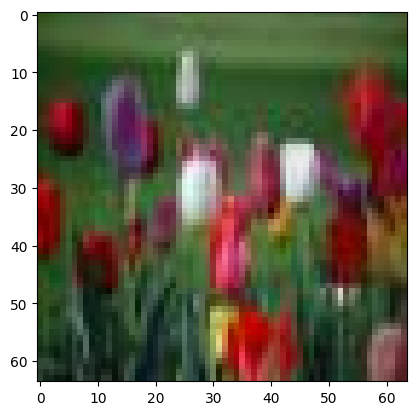

In [8]:
index = 2200
plt.imshow(train_set_x_orig[index])
print(f"The Y value is {train_set_y[:,index]} . The class is {classes[np.squeeze(train_set_y[:,index])]}")

In [9]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print(f"Number of traning examples {m_train}")
print(f"Number of testing examples {m_test}")
print(f"Image size {num_px}")

Number of traning examples 4540
Number of testing examples 510
Image size 64


In [10]:
train_set_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print(f" {train_set_flatten.shape}  {test_set_flatten.shape} ")

 (12288, 4540)  (12288, 510) 


In [11]:
train_set_x = train_set_flatten/255.
test_set_x  = test_set_flatten/255.

In [12]:
def initialize(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [13]:
def sigmoid_pred(X, w, b):
    z = np.dot(X, w) + b
    return 1 / (1 + np.exp(-z))

In [14]:
def propogate(w,b,X,y,num_iterations,anpha, print_cost):
    costs= []

    for i in range(num_iterations):
        m = X.shape[1]
        # Tính sigmoid
        A = sigmoid(X, w, b)
        cost = (-1/m) * np.sum((y * np.log(A)) + (1-y) * np.log(1-A))
        # gradient descent
        dw = (X @ (A - y).T ) / m
        db = (np.sum(A - y))/m
        
        w = w - anpha * dw
        b = b - anpha * db

        params = {
            "w" : w,
            "b" : b
        }

        grads = {
            "dw" : dw,
            "db" : db
        }

        if print_cost and i % 100 == 0:
            print(f"Cost : {cost}")
        else:
            costs.append(cost)
    return params, grads, costs

In [15]:
# Sigmoid function 
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [16]:
def model(X_train, y_train, X_test, y_test, num_iterations, anpha, print_cost):

    w,b = initialize(X_train.shape[0])
    pamars, grads, costs = propogate(w,b,X_train, y_train,num_iterations, anpha, print_cost )

    w = pamars["w"]
    b = pamars["b"]

    y_pred_train = predict(w,b,X_train)
    y_pred_test = predict(w,b,X_test)

    print(f"Train accuracy {100 - np.mean(np.abs(y_pred_train - y_train)) * 100 :.9f}")
    print(f"Test accuracy {100 - np.mean(np.abs(y_pred_test - y_test)) * 100 :.9f}")

    d = {
        "costs" : costs,
        "Prediction Train" : y_pred_train,
        "Prediction Test"  : y_pred_test,
        "w" : w,
        "b" : b,
        "anpha" : anpha,
        "num interations" : num_iterations
    }
    return d

In [17]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y,num_iterations = 1500 ,anpha = 0.001, print_cost = True)

NameError: name 'sigmoid' is not defined

In [ ]:
anpha = [0.00001, 0.0001, 0.001]
models = {}
for i in anpha:
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y,num_iterations = 1000 ,anpha = i, print_cost = False)
    print('\n' + '------------------------------------------------------------' + '\n')

for i in anpha :
    plt.plot(np.squeeze(models[str(i)]["costs"]), label = str(models[str(i)]["anpha"]))

plt.xlabel("iterations (hundreds)")
plt.ylabel("cost")

legend = plt.legend(loc = "upper center" , shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.9')
plt.show()

In [ ]:
img = Image.open("C:/Users/khanh/Documents/train_flower/r2o%20(171).jpg")
new_img = img.resize((64,64))
np_array = np.asarray(new_img)

my_images_stander = np_array/255.
my_images = my_images_stander.reshape(1,-1).T
plt.imshow(my_images_stander)

In [ ]:
print(d["w"],d["b"]) 
print(d["w"].T @ train_set_x + d["b"])

In [ ]:
my_pred_images = predict(d["w"], d["b"],my_images)

In [ ]:
print(my_pred_images)